In [3]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_pickle("../data/DF_UNsession_rawtxt_per_country_from1990.pkl")
df

,country,year,session,txt
4430,AFG,1990,45,"﻿Allow me, first of all, Sir, to congratulate ..."
4431,AGO,1990,45,"﻿First I would like to congratulate you, Sir, ..."
4432,ALB,1990,45,﻿It is a special pleasure for me to speak at t...
4433,ARE,1990,45,"﻿\nMr. President, on behalf of the delegation ..."
4434,ARG,1990,45,"﻿At the outset, let me convey to you, Sir, my ..."
...,...,...,...,...
10563,WSM,2022,77,I extend Samoa’s congratulations to His Excell...
10564,YEM,2022,77,"At the outset, I would like to sincerely congr..."
10565,ZAF,2022,77,Allow me to join all speakers before me in con...
10566,ZMB,2022,77,"At the outset, we would like to congratulate M..."


In [7]:
def stem_tokenizer(txt, stemmer, tokenizer):
    txt = tokenizer.tokenize(txt.lower())
    txt = [ps.stem(word) for word in txt]
    txt = ' '.join(txt)
    return txt

def stem_counter(keyword, corpus, stemmer, tokenizer):

    keyword = stem_tokenizer(keyword, stemmer, tokenizer)

    corpus = stem_tokenizer(corpus, stemmer, tokenizer)

    return corpus.count(keyword)

keyword = "global warming" 


ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

# test_corpus = ' '.join(df.loc[df["year"]==2000].txt)
# print(stem_counter(keyword, test_corpus, ps, tokenizer) )


13


In [9]:
df_tokenized_per_year = pd.DataFrame()

years = range(1990, 2023)

for year in years:
    df_of_year = df.loc[df["year"]==year]
    corpus_of_year = ' '.join(df_of_year.txt)
    corpus_tokanized = stem_tokenizer(corpus_of_year, ps, tokenizer)
    
    new_row = pd.DataFrame({"year":[year], "txt_tokanized":[corpus_tokanized]})

    df_tokenized_per_year = pd.concat([df_tokenized_per_year, new_row], ignore_index = True)
    
    print(year)

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [10]:
print(df_tokenized_per_year)

    year                                      txt_tokanized
0   1990  allow me first of all sir to congratul you on ...
1   1991  at the outset i wish to convey to ambassador s...
2   1992  i shall read out the follow statement on behal...
3   1993  permit me first of all to congratul ambassador...
4   1994  it give me great pleasur to convey on behalf o...
5   1995  on the eve of the fiftieth anniversari of the ...
6   1996  at the outset allow me sir to express my deleg...
7   1997  let me impart at the outset the sad news i rec...
8   1998  the urgenc of the alarm situat in afghanistan ...
9   1999  allow me to join the speaker preced me to cong...
10  2000  on my way to the assembl hall i wa inform by t...
11  2001  at the outset on behalf of the govern of the i...
12  2002  not veri far from here stood two tower that sy...
13  2003  there is no realiti more oppress than the sile...
14  2004  nelson mandela onc describ hi countryí transit...
15  2005  i have the honour to inform th

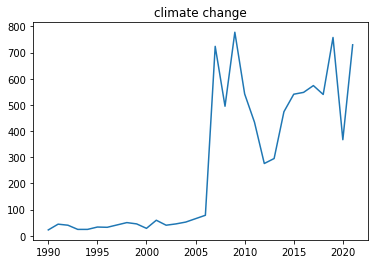

In [12]:


keyword = "climate change" 
keyword_tokenized = stem_tokenizer(keyword, ps, tokenizer)
l_x = range(1990,2022)

l_y = []
for year in l_x:
    corpus_of_year = df_tokenized_per_year.loc[df_tokenized_per_year["year"]==year]["txt_tokanized"].values[0]
    y = corpus_of_year.count(keyword_tokenized)
    l_y.append(y)


plt.title(keyword)
plt.plot(l_x,l_y, )